In [1]:
import pandas as pd
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt
import sys
import matplotlib
%matplotlib inline

In [2]:
plans_2018 = pd.read_csv(r'C:\Users\l_gas\Documents\Development\SpringBoard_DataScience\HealthInsuranceData\IndivMarketPlans\QHP_PY2018_Medi-_Indi-_Land.csv',
                   low_memory=False, usecols=['State Code','FIPS County Code','County Name',
'Metal Level','Issuer Name','HIOS Issuer ID','Plan ID (Standard Component)','Plan Marketing Name','Plan Type',
'Standardized Plan Design','Rating Area','Child Only Offering','Source','Accreditation',
'Adult Dental ','Child Dental ','EHB Percent of Total Premium',
'Premium Scenarios','Premium Child Age 0-14','Premium Child Age 18','Premium Adult Individual Age 21',
'Premium Adult Individual Age 27','Premium Adult Individual Age 30 ','Premium Adult Individual Age 40 ',
'Premium Adult Individual Age 50 ','Premium Adult Individual Age 60 '])

In [3]:
#Source file size - Note that not all columns were uploaded, just geographic area variables, insurer information and premiums
print(plans_2018.shape)

(39348, 26)


In [4]:
#Describe the data in plans_2018
plans_2018.describe()

,FIPS County Code,HIOS Issuer ID,Premium Scenarios,Premium Child Age 0-14,Premium Child Age 18,Premium Adult Individual Age 21,Premium Adult Individual Age 27,Premium Adult Individual Age 30,Premium Adult Individual Age 40,Premium Adult Individual Age 50,Premium Adult Individual Age 60
count,39348.000000,39348.000000,0.0,39348.000000,39348.000000,39348.000000,39348.000000,39348.000000,39348.000000,39348.000000,39348.000000
mean,30717.150554,47555.950646,NaN,299.905370,355.726905,393.943064,414.407215,448.285120,504.372324,705.132349,1070.460071
std,15533.700753,26056.406044,NaN,89.664127,108.471209,116.399537,122.622838,132.397626,148.882845,208.184728,315.977377
min,1001.000000,10091.000000,NaN,113.100000,134.700000,147.840000,154.930000,167.800000,188.940000,264.040000,401.230000
25%,18005.000000,26539.000000,NaN,236.920000,279.360000,312.160000,328.300000,355.190000,399.570000,558.490000,848.210000
50%,29161.000000,38166.000000,NaN,287.790000,342.040000,378.960000,398.415000,431.350000,484.500000,677.850000,1028.900000
75%,46055.000000,70525.000000,NaN,353.320000,420.945000,462.420000,486.220000,526.280000,592.310000,828.025000,1257.080000
max,56045.000000,99969.000000,NaN,904.310000,1079.260000,1182.100000,1238.840000,1341.690000,1510.730000,2111.240000,3208.230000


In [5]:
fips_numofplans=Counter(plans_2018['FIPS County Code'])
print("Number of FIPS:")
print(len(fips_numofplans))

Number of FIPS:
2722


In [6]:
print("Number of distinct plan ids:")
print(len(Counter(plans_2018['Plan ID (Standard Component)'])))

Number of distinct plan ids:
2085


In [7]:
print("Number of distinct States in the Database")
print(len(Counter(plans_2018['State Code'])))
state_list=plans_2018['State Code'].unique()
print(state_list)

Number of distinct States in the Database
39
['AK' 'AL' 'FL' 'AR' 'AZ' 'DE' 'GA' 'IL' 'MI' 'HI' 'MO' 'IA' 'IN' 'MS'
 'KS' 'KY' 'LA' 'ME' 'MT' 'PA' 'ND' 'NJ' 'NE' 'NM' 'NH' 'NC' 'OR' 'WI'
 'NV' 'OH' 'OK' 'SD' 'SC' 'VA' 'TX' 'TN' 'UT' 'WV' 'WY']


In [8]:
# Count number of lines under each plan metal level
metal_cnt=Counter(plans_2018['Metal Level'])
print("List of different metal levels and count of plans under each level:")
print(metal_cnt)

List of different metal levels and count of plans under each level:
Counter({'Silver': 16899, 'Bronze': 9211, 'Gold': 6847, 'Expanded Bronze': 3008, 'Catastrophic': 2819, 'Platinum': 564})


In [9]:
# Count number of lines under each Standardized Plan Design level - explore levels
std_plandesign_cnt=Counter(plans_2018['Standardized Plan Design'])
print("Number of plans/FIPS combinations under each Plan Design Level:")
print(std_plandesign_cnt)

#silver_plans_2018=plans_2018['Metal Level'=='Silver']
#main_plans_2018=plans_2018[plans_2018['Metal Level'=='Silver']]

#main_plans_2018=plans_2018[plans_2018['Metal Level'=='Silver' or 'Metal level'=='Bronze' or 'Metal level'=='Gold' or 'Metal level'=='Platinum']]
#std_plandesign_mainlvl=Counter(main_plans_2018['Standardized Plan Design'])
#print("\nNumber of plans/FIPS combinations under each Plan Design Level- Only Bronze, Silver, Platinum and Gold:")
#print(std_plandesign_mainlvl)

Number of plans/FIPS combinations under each Plan Design Level:
Counter({'Not Applicable': 36296, 'Design 1': 2493, 'Design 2': 334, 'Design 3': 216, 'Design 4': 9})


In [10]:
# Count number of lines under each Plan type
plantype_cnt = Counter(plans_2018['Plan Type'])
print("Number of plans/FIPS combinations under each Plan Type:")
print(plantype_cnt)

Number of plans/FIPS combinations under each Plan Type:
Counter({'HMO': 18020, 'PPO': 10725, 'EPO': 7891, 'POS': 2712})


In [11]:
# Count number of plans offered for each FIPS
#print(plans_2018.shape)
print(plans_2018.info())
#plancnt=plans_2018['HIOS Issuer ID'].group_by('FIPS County Code').count()
plancnt=plans_2018.groupby('FIPS County Code')[['Premium Child Age 0-14','Premium Child Age 18','Premium Adult Individual Age 21',
'Premium Adult Individual Age 27','Premium Adult Individual Age 30 ','Premium Adult Individual Age 40 ',
'Premium Adult Individual Age 50 ','Premium Adult Individual Age 60 ']].agg(['count'])
print(plancnt)
print(plancnt.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39348 entries, 0 to 39347
Data columns (total 26 columns):
State Code                          39348 non-null object
FIPS County Code                    39348 non-null int64
County Name                         39348 non-null object
Metal Level                         39348 non-null object
Issuer Name                         39348 non-null object
HIOS Issuer ID                      39348 non-null int64
Plan ID (Standard Component)        39348 non-null object
Plan Marketing Name                 39348 non-null object
Plan Type                           39348 non-null object
Standardized Plan Design            39348 non-null object
Rating Area                         39348 non-null object
Child Only Offering                 39348 non-null object
Source                              39348 non-null object
Accreditation                       19327 non-null object
Adult Dental                        2206 non-null object
Child Dental            

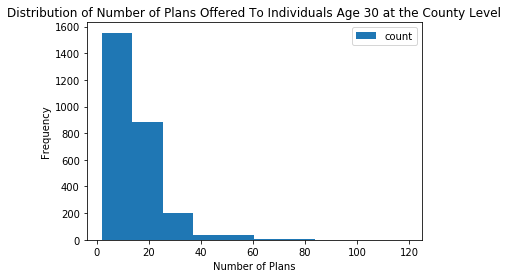

In [12]:
fips_age30=plancnt[[('Premium Adult Individual Age 30 ','count')]]
fips_age30['Premium Adult Individual Age 30 '].plot(kind='hist')
plt.xlabel('Number of Plans')
plt.title('Distribution of Number of Plans Offered To Individuals Age 30 at the County Level')
plt.show()

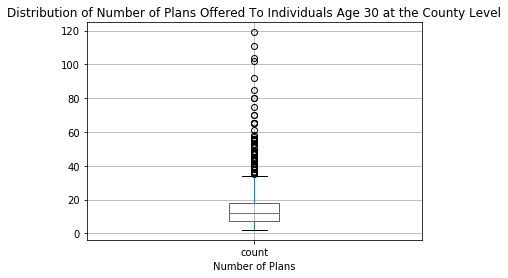

In [13]:
fips_age30['Premium Adult Individual Age 30 '].boxplot()
plt.xlabel('Number of Plans')
plt.title('Distribution of Number of Plans Offered To Individuals Age 30 at the County Level')
plt.show()

In [14]:
fips_age30.describe()

,Premium Adult Individual Age 30
,count
count,2722.000000
mean,14.455547
std,10.558827
min,2.000000
25%,7.000000
50%,12.000000
75%,18.000000
max,119.000000


In [69]:
plancnt=plans_2018.groupby('FIPS County Code')[['Premium Child Age 0-14','Premium Child Age 18','Premium Adult Individual Age 21',
'Premium Adult Individual Age 27','Premium Adult Individual Age 30 ','Premium Adult Individual Age 40 ',
'Premium Adult Individual Age 50 ','Premium Adult Individual Age 60 ']].agg(['count','mean'])
fips_age30=plancnt[[('Premium Adult Individual Age 30 ','count')]].reset_index()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722 entries, 1001 to 56045
Data columns (total 1 columns):
(Premium Adult Individual Age 30 , count)    2722 non-null int64
dtypes: int64(1)
memory usage: 122.5 KB
None


In [ ]:
planmeans=plans_2018.groupby('FIPS County Code')[['Premium Child Age 0-14','Premium Child Age 18','Premium Adult Individual Age 21',
'Premium Adult Individual Age 27','Premium Adult Individual Age 30 ','Premium Adult Individual Age 40 ',
'Premium Adult Individual Age 50 ','Premium Adult Individual Age 60 ']].agg(['means'])
